In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Importing data

In [10]:
df= pd.read_csv("realestate/nyc-rolling-sales.csv", index_col=0)

## Preprocessing and cleaning

In [3]:
#checking for null values
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## Categorical Features
 dealing with Categorical data is not a easy tasks. Let's have a look

In [4]:
#Transposing make visualization easier for big datasets
categorical = df.select_dtypes(include=['object'])
#categorical.head().transpose()

NOTE: from the above, we notice that some columns are empty for example; EASE-MENT and APARTMENT NUMBER. 
There is no best way  to deal with missing data. Traditional, people drop columns with lots of missing values. 

In [6]:
## We want to know the categorical data description.
categorical.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
EASE-MENT,84548,1,,84548
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,84548,3989,,65496
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


Some features values should be numeric. Some have "-" and whitespaces. We need to clean them

In [11]:
#removing "-" in data_frame['SALE PRICE'] and replacing

def clean_data(x):
    if '-' in x or " " in x:
        x=0
    else:
        x=int(x)
    return x
df['SALE PRICE'] = df['SALE PRICE'].apply(clean_data)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].apply(clean_data)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].apply(clean_data)

In [12]:
# Working with dates
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%Y-%m-%d %H:%M:%S')

dropping columns: EASE-MENT is 90% empty, APARTMENT NUMBER is 65% empty. To avoid complication, I will drop them. 

In [13]:
df = df.drop(columns=["EASE-MENT","APARTMENT NUMBER"])

## Numerical features

NOTE: It is impossible to have zipcode, years abd land square feet and gross square feet be zero. Sale Price also have values equal to zero. We will assume that, those building were not sold. Dropping values with zero values might lead to loss of important information. There are many ways to deal with this kind of weird data. I will replace values with zero in land square feet, gross square feet with their average. I will drop year built values with zeros because there is no year zero. 

In [10]:
def replace_zeros_with_average(x):
    if x == float(0):
        x = np.average(df['GROSS SQUARE FEET'])
    return x
replace_zeros_with_average(0.000000000)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].apply(replace_zeros_with_average)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].apply(replace_zeros_with_average)   

In [11]:
numerical1 = df.select_dtypes(exclude=['object'])
numerical1.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.896469e+03,3.982102e+03,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,3.484377e+04,2.872375e+04,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,6.000000e+01,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.483000e+03,1.904000e+03,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.724445e+03,2.724445e+03,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,2.724445e+03,2.724445e+03,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


### EXPLORATORY ANALYSIS

Since we are done cleaning the data. It is a good time now to explore the data. Here, we are trying to capture relationship between different features.

#### categorical analysis 

In [15]:
categorical_explore = df.select_dtypes(include=['object'])
categorical_explore.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


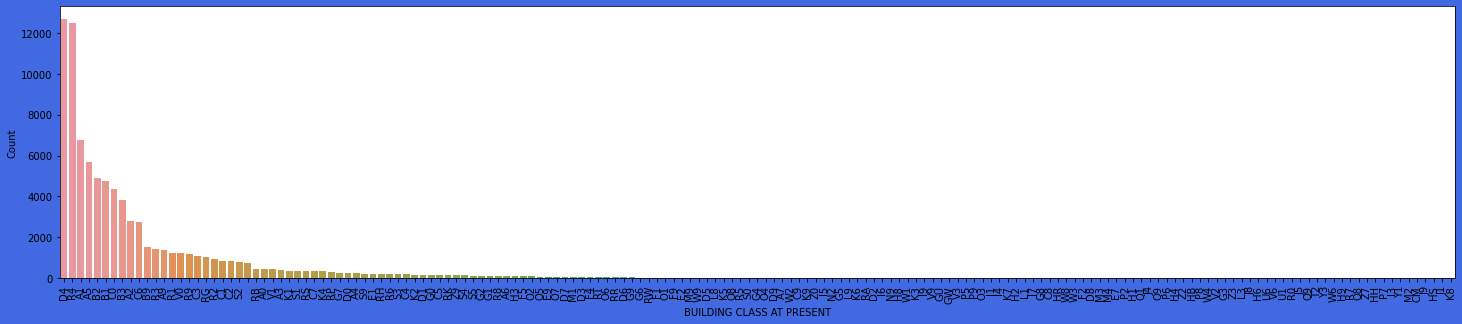

In [31]:
plt.figure(2, figsize=(25,5),facecolor='royalblue')
build = sn.countplot(x='BUILDING CLASS AT PRESENT',order= df["BUILDING CLASS AT PRESENT"].value_counts().index,data=df)
build.set_ylabel('Count')
build.set_xticklabels(build.get_xticklabels(), rotation = 90)
plt.show()

## Visualization

 #### Relationship between TAX CLASS AT PRESENT and SALE PRICE

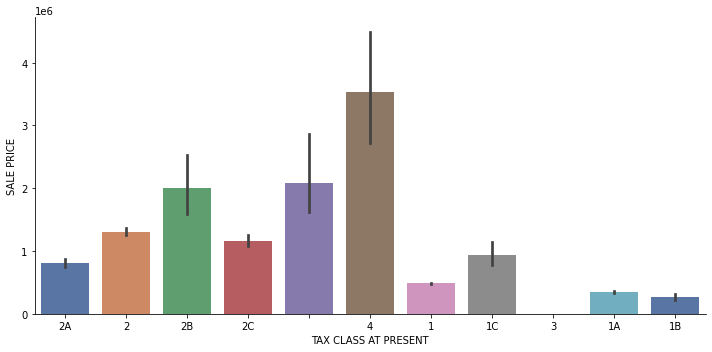

In [32]:
cat = sn.catplot(x='TAX CLASS AT PRESENT', kind='bar', y='SALE PRICE',palette='deep',data=df, aspect=2, margin_titles=True)

<AxesSubplot:xlabel='TAX CLASS AT PRESENT', ylabel='count'>

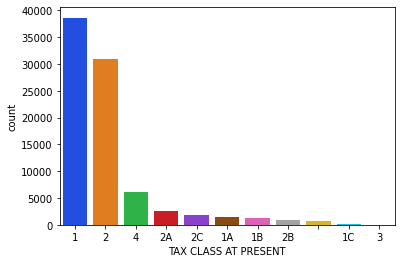

In [34]:
sn.countplot(x='TAX CLASS AT PRESENT', order=df['TAX CLASS AT PRESENT'].value_counts().index, palette='bright', data=df)

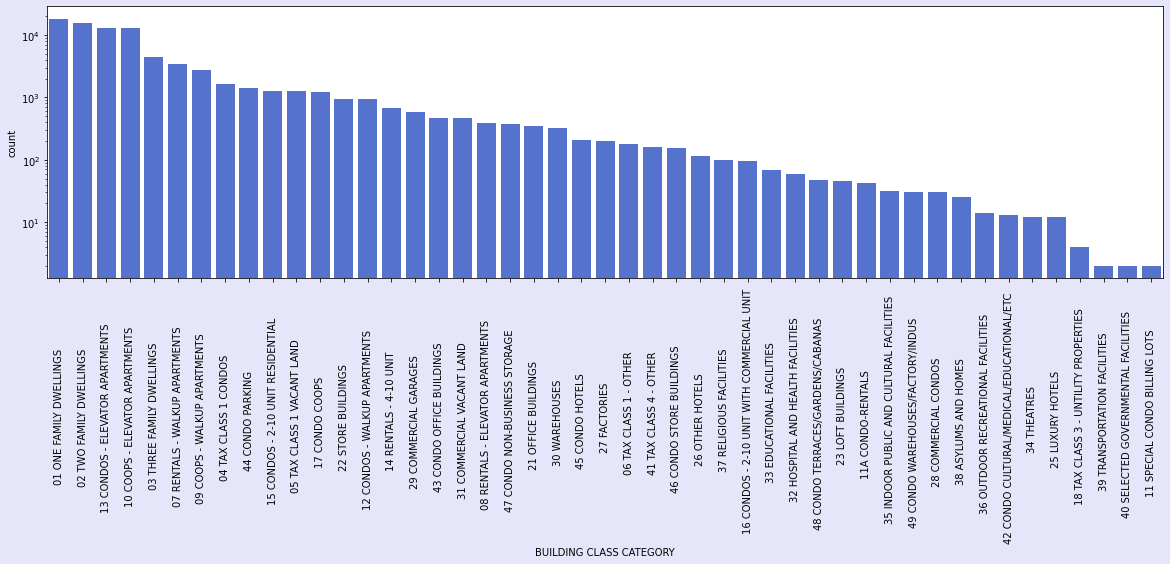

In [36]:
plt.figure(1,figsize=(20,5),facecolor="lavender")
graph = sn.countplot(x='BUILDING CLASS CATEGORY',color='royalblue', order= df["BUILDING CLASS CATEGORY"].value_counts().index, data=df)
graph.set_yscale('log')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:title={'center':'AVERAGE PRICE PER TAX CLASS'}, xlabel='TAX CLASS AT PRESENT'>

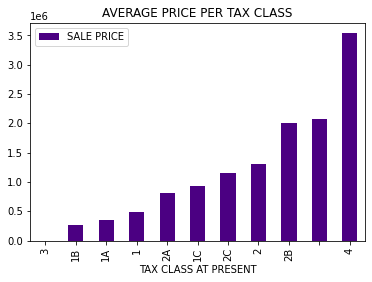

In [59]:
pivot = df.pivot_table(values='SALE PRICE',index='TAX CLASS AT PRESENT', aggfunc = np.average).sort_values('SALE PRICE')
pivot.plot(kind='bar', title='AVERAGE PRICE PER TAX CLASS', color="indigo")

## NUMERICAL FEATURES EXPLORATORY ANALYSIS

In [37]:
numerical = df.select_dtypes(exclude=['object'])
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    84548 non-null  int64         
 1   BLOCK                      84548 non-null  int64         
 2   LOT                        84548 non-null  int64         
 3   ZIP CODE                   84548 non-null  int64         
 4   RESIDENTIAL UNITS          84548 non-null  int64         
 5   COMMERCIAL UNITS           84548 non-null  int64         
 6   TOTAL UNITS                84548 non-null  int64         
 7   LAND SQUARE FEET           84548 non-null  int64         
 8   GROSS SQUARE FEET          84548 non-null  int64         
 9   YEAR BUILT                 84548 non-null  int64         
 10  TAX CLASS AT TIME OF SALE  84548 non-null  int64         
 11  SALE PRICE                 84548 non-null  int64         
 12  SALE 

## correlation
 We want to check if there is any correlation between numerical variables. Variables with strong correlation do not improve accuracy of the model and therefore, either remove one of them.

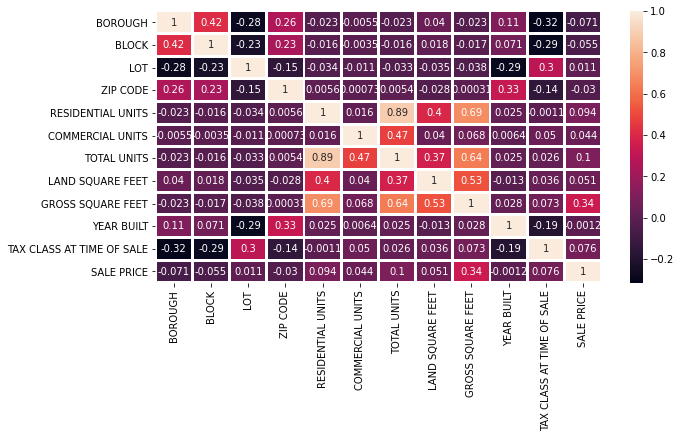

In [50]:
plt.figure(3, figsize=(10,5))
heat_map = sn.heatmap(data=numerical.corr(),annot=True, linewidths=2)
heat_map.set_yticklabels(heat_map.get_yticklabels())
heat_map.set_xticklabels(heat_map.get_xticklabels())
plt.show()

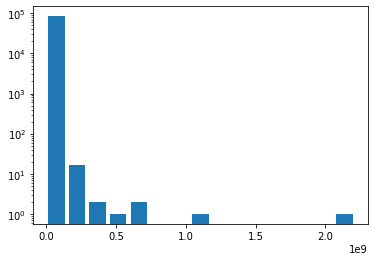

In [58]:
plt.hist(
    df["SALE PRICE"],
    bins = 15,
    log = True,
    rwidth = 0.8
)
plt.show()

<AxesSubplot:xlabel='BOROUGH'>

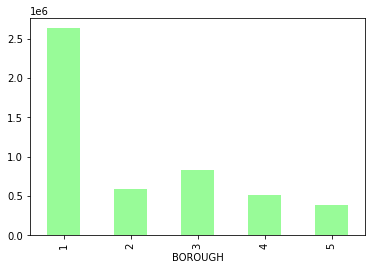

In [71]:
df.groupby('BOROUGH').mean()['SALE PRICE'].plot(kind='bar', color='palegreen', order=df['SALE '])

## Data Preparation

We are preparing data so we can apply machine learning algorithms. We will use linear regression algorithm to predict sale price

In [191]:
data = pd.read_csv("realestate/cleandata.csv", index_col=0)

We need to remove features that are quite redudant. for example, BUILDING CLASS AT PRESESNT are quite similar to BUILDING CLAS AT TIME OF SALE. 

Geolocation variables such as ZIPCODE can play an important role in identifying NEIGHBOORHOOD, AND ADDRESS.Since we are not interested in time series analysis, we will drop SALE DATE

In [192]:
data = data.drop(columns=['NEIGHBORHOOD', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'SALE DATE','YEAR'])

## DUMMYFING CATEGORICAL VARIABLES

In [197]:
new_df = pd.get_dummies(data, prefix='BCC', columns=['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'])

### Performing Regression

##### Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [292]:
#intializing target and features variables
features = new_df.drop(columns=['SALE PRICE'])
target = np.array(new_df['SALE PRICE']).reshape(-1,1)

In [293]:
#creating a linear regression
linear_regression = LinearRegression()
model = linear_regression.fit(features, target)

In [294]:
#viewing model intercepts
print("intercept:", model.intercept_)

intercept: [783927.48054403]


### Reduce variance of our linear model: 

There are two methods to do so: One, We can use learning algorithms that includes shrinkage penalty. Like Ridge or Lasso

In [295]:
#In reidge regression, you may need to standardixze the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [296]:
#Create a ridge regression
regression = Ridge(alpha=0.5)
ridModel = regression.fit(features_standardized, target)

In [297]:
print(ridModel.intercept_)

[1056622.99414534]


#### Lets now perform actually prediction using Ridge regression
###### first split data into train and test set

In [298]:
#splitting our dataset into training and test set
x_train,x_test,y_train, y_test = train_test_split(features_standardized, target, random_state=5, test_size=0.33)

In [303]:
#Training the model
ridge = Ridge(alpha=0.7)
ridgeModel = ridge.fit(x_train, y_train)

In [304]:
cross_val_score(ridge, features_standardized, target, scoring='neg_mean_squared_error')

array([-5.25180260e+14, -2.20955942e+13, -3.41031785e+13, -5.33601719e+13,
       -1.09403388e+14])

In [305]:
y_pred = ridgeModel.predict(x_test)

In [306]:
mse = mean_squared_error(y_test, y_pred)
mse

169295125534741.25